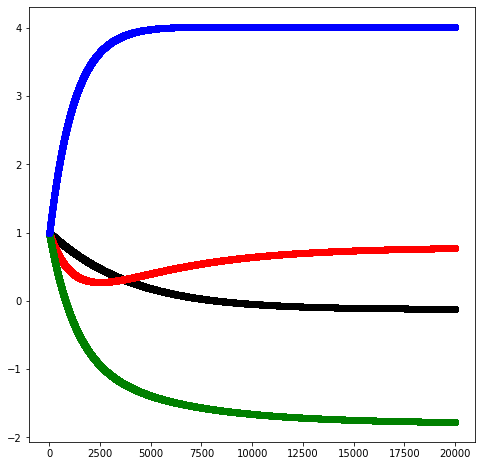

In [121]:
import numpy as np 
from matplotlib import pyplot as plt 
import csv
import copy

#compute prediction
def compute_prediction (theta,data_array, h):
  m=float(len(data_array))
  theta_array=[]
  theta_array.append(theta)
  theta_array=np.transpose(theta_array)
  theta_array=np.array(theta_array,dtype=float)
  prediction=np.dot(data_array,theta_array)

  return prediction

# Objective Function
def compute_cost(theta,data_array, h):
  m=float(len(h))
  prediction = compute_prediction(theta,data_array, h)
  J=(1/2)*(1/m)*(np.sum(np.square(prediction-h)))

  return J

# get theta, theta_history, J_history
def compute_theta(theta, data_array, h, alpha, num):
  m = float(len(data_array))
  data_array_trans=copy.deepcopy(np.transpose(data_array))
  data_x=[]
  data_y=[]
  data_z=[]
  data_x.append(copy.deepcopy(data_array_trans[1]))
  data_x=np.transpose(data_x)
  data_y.append(copy.deepcopy(data_array_trans[2]))
  data_y=np.transpose(data_y)
  data_z.append(copy.deepcopy(data_array_trans[3]))
  data_z=np.transpose(data_z)


  J_history=[]
  theta_history=[]

  J_history.append(compute_cost(theta,data_array, h))
  theta_history.append(copy.deepcopy(theta))


  for i in range(num):
    prediction=compute_prediction(theta, data_array, h)
    loss= prediction - h
    

    t0 = alpha*(1/m)*np.sum(loss)
    t1 = alpha*(1/m)*np.sum(loss*data_x)
    t2= alpha*(1/m)*np.sum(loss*data_y)
    t3= alpha*(1/m)*np.sum(loss*data_z)
  
    
    theta[0]-=t0
    theta[1]-=t1
    theta[2]-=t2
    theta[3]-=t3
  
   

    J_history.append(compute_cost(theta,data_array, h))
    theta_history.append(copy.deepcopy(theta))

  return theta, theta_history, J_history

#데이터 저장하기
nofdata = 3
#data_train데이터
train_x=[]
train_y=[]
train_z=[]
train_h=[]
#data_test데이터
test_x=[]
test_y=[]
test_z=[]
test_h=[]

with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    for i in reader:
      train_x.append(float(copy.deepcopy(i[0]))/10)
      train_y.append(float(copy.deepcopy(i[1]))/10)
      train_z.append(float(copy.deepcopy(i[2]))/10)
      train_h.append([float(copy.deepcopy(i[3]))/10])


train_data_array=[]
temp=[]
for i in range(len(train_x)):
  temp.append(1)
  temp.append(copy.deepcopy(train_x[i]))
  temp.append(copy.deepcopy(train_y[i]))
  temp.append(copy.deepcopy(train_z[i]))
  train_data_array.append(copy.deepcopy(temp))
  temp.clear()


with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    for i in reader:
      test_x.append(float(copy.deepcopy(i[0]))/10)
      test_y.append(float(copy.deepcopy(i[1]))/10)
      test_z.append(float(copy.deepcopy(i[2]))/10)
      test_h.append([float(copy.deepcopy(i[3]))/10])

test_data_array=[]
for i in range(len(test_x)):
  temp.append(1)
  temp.append(copy.deepcopy(test_x[i]))
  temp.append(copy.deepcopy(test_y[i]))
  temp.append(copy.deepcopy(test_z[i]))
  test_data_array.append(copy.deepcopy(temp))
  temp.clear()

train_data_array = np.array(train_data_array,dtype=float)
train_h = np.array(train_h,dtype=float)
test_data_array = np.array(test_data_array,dtype=float)
test_h = np.array(test_h,dtype=float)


#Linear Model, f(x,y,z) = theta0 + theta1*x + theta2*y + theta3*z
theta=[1.0, 1.0, 1.0, 1.0]
theta = np.array(theta)
alpha=0.001
num=20000


theta, theta_h, cost_h = compute_theta(theta, train_data_array, train_h, alpha, num)
theta0=[]
theta1=[]
theta2=[]
theta3=[]

for i in range(len(theta_h)):
  theta0.append(copy.deepcopy(theta_h[i][0]))
  theta1.append(copy.deepcopy(theta_h[i][1]))
  theta2.append(copy.deepcopy(theta_h[i][2]))
  theta3.append(copy.deepcopy(theta_h[i][3]))
  
plt.figure(figsize=(8, 8))
xla=num+1

plt.scatter(range(xla),theta0, c='black')
plt.scatter(range(xla),theta1, c='red')
plt.scatter(range(xla),theta2, c='green')
plt.scatter(range(xla),theta3, c='blue')
plt.show()


        


In [1]:
from google.colab import files
uploaded = files.upload()


Saving data_test.csv to data_test.csv
Saving data_train.csv to data_train.csv
